**Processamento Digital de Imagens - 2022/01**<br/>
**Engenharia da Computação**<br/>
**Aluno:** Gabriel Soares Baptista, 2018102117<br/>

### Questão 4

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

### Resolução

Primeiro lemos a imagem que iremos adicionar a fronteira.

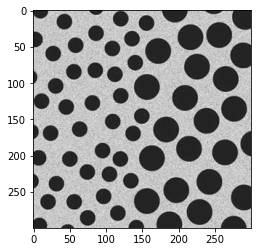

In [11]:
image = plt.imread('../images/Figura 9.43.png')

plt.imshow(image, cmap='gray')
plt.show()

Inicialmente, aplica-se um fechamento para conseguirmos obter a área apenas com os círculos maiores, isto é, segmentar a área com a textura de círculos maiores.

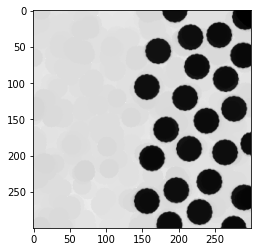

In [12]:
# closing
selem = morphology.disk(13)
image0 = morphology.dilation(image, footprint=selem)
image0 = morphology.erosion(image0, footprint=selem)

plt.imshow(image0, cmap='gray')
plt.show()

Após o fechamento, queremos unir toda área em que a textura é a mesma, portanto, aplica-se uma abertura para que os discos se unam e se tornem apenas uma área.

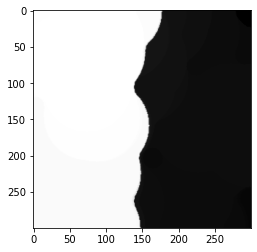

In [13]:
selem = morphology.disk(60)

# opening
image1 = morphology.erosion(image0, footprint=selem)
image1 = morphology.dilation(image1, footprint=selem)

plt.imshow(image1, cmap='gray')
plt.show()

Agora podemos obter o gradiente morfológico da imagem acima para encontrar a borda entre as duas texturas da imagem original. O cálculo do gradiente morfológio é feito através da subtração da imagem dilatada pela imagem aplicada de uma erosão.

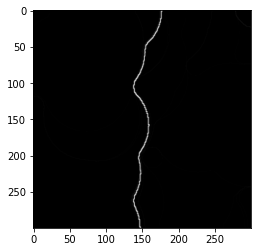

In [14]:
selem = morphology.rectangle(2, 2)

# morphological gradient
gradient0 = morphology.dilation(image1, footprint=selem)
gradient1 = morphology.erosion(image1, footprint=selem)
gradient = gradient0 - gradient1

plt.imshow(gradient, cmap='gray')
plt.show()

Unindo a borda encontrada com a imagem original obtemos uma imagem com uma borda de divisão entra as duas texturas diferentes.

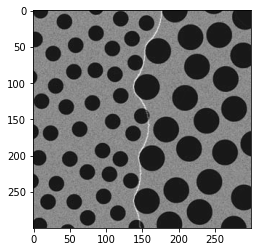

In [15]:
plt.imshow(gradient + image, cmap='gray')
plt.show()

Podemos reconstruir a imagem original do livro através dos resultados obtidos.

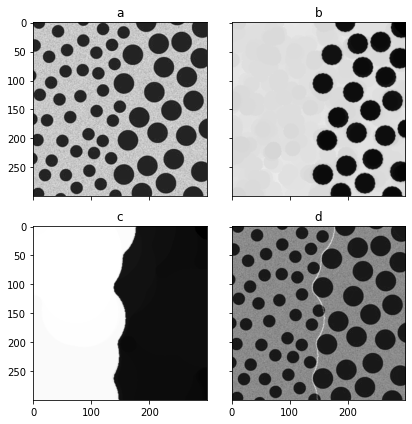

In [16]:
_, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
axs[0][0].imshow(image, cmap='gray')
axs[0][0].set_title('a')
axs[0][1].imshow(image0, cmap='gray')
axs[0][1].set_title('b')
axs[1][0].imshow(image1, cmap='gray')
axs[1][0].set_title('c')
axs[1][1].imshow(gradient + image, cmap='gray')
axs[1][1].set_title('d')
plt.tight_layout()
plt.show()